In [2]:
#pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Connect to server
#import pyodbc
#from dotenv import dotenv_values

# Datetime
from datetime import datetime

# Data manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import seaborn as sns
import missingno as msno
from prophet.plot import plot_plotly, plot_components_plotly

# Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

# Statistical Analysis
import scipy.stats as stats
from statsmodels.stats.weightstats import ttest_ind
import statsmodels.api as sm
#from pmdarima.arima import CHTest, nsdiffs
#from arch.unitroot import ADF, KPSS
from statsmodels.stats.diagnostic import acorr_ljungbox
#import phik
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Machine Learning Modeling
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
#import xgboost as xgb
from sklearn.metrics import mean_squared_error
import joblib
from sklearn.pipeline import Pipeline
from prophet import Prophet

import os

import random

import warnings

# ignore warnings
warnings.filterwarnings('ignore')

from pathlib import Path, PureWindowsPath

### Import data

In [3]:
path_cwd = Path(PureWindowsPath(os.path.dirname(os.getcwd())))
path_cwd
path = path_cwd / 'data/processed'

In [4]:
df_test_p = pd.read_pickle(path / 'df_test_fb.pkl')
df_train_p = pd.read_pickle(path / 'df_train_fb.pkl')

In [5]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'family' column
df_train_p['family_enc'] = label_encoder.fit_transform(df_train_p['family'])
df_test_p['family_enc'] = label_encoder.fit_transform(df_test_p['family'])

In [6]:
model_df = df_train_p[['date', 'sales', 'family_enc']]
model_df.columns = ['ds', 'y', 'family_enc']
model_df['ds'] = pd.to_datetime(model_df['ds'])

In [7]:
model_df_test = df_test_p[['date', 'sales', 'family_enc']]
model_df_test.columns = ['ds', 'y', 'family_enc']
model_df_test['ds'] = pd.to_datetime(model_df_test['ds'])

In [8]:
m = Prophet()
m.add_regressor('family_enc')
m.fit(model_df)

14:52:49 - cmdstanpy - INFO - Chain [1] start processing
14:53:16 - cmdstanpy - INFO - Chain [1] done processing


In [9]:
df_test_p

,date,sales,family,familycluster,store_nbr,family_enc
28624,2015-05-21,15.000,GROCERY II,1,1,13
28622,2015-05-21,100.000,FROZEN FOODS,1,1,11
28621,2015-05-21,128.000,EGGS,5,1,10
28620,2015-05-21,133.041,DELI,5,1,9
28619,2015-05-21,625.000,DAIRY,5,1,8
...,...,...,...,...,...,...
526028,2015-06-14,699.000,DAIRY,5,18,8
1067433,2015-06-14,52.000,HOME AND KITCHEN I,0,29,15
1067444,2015-06-14,1.000,PET SUPPLIES,0,29,26
1067445,2015-06-14,6.000,PLAYERS AND ELECTRONICS,0,29,27


In [10]:
forecast = m.predict(model_df_test.drop(columns="y"))

In [11]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,extra_regressors_additive,...,family_enc,family_enc_lower,family_enc_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-05-21,262.165171,-851.673591,1364.967216,262.165171,262.165171,-18.498294,-18.498294,-18.498294,50.705869,...,50.705869,50.705869,50.705869,-69.204163,-69.204163,-69.204163,0.0,0.0,0.0,243.666877
1,2015-05-21,262.165171,-1086.360701,1203.515023,262.165171,262.165171,-221.321771,-221.321771,-221.321771,-152.117608,...,-152.117608,-152.117608,-152.117608,-69.204163,-69.204163,-69.204163,0.0,0.0,0.0,40.843400
2,2015-05-21,262.165171,-1185.648531,1193.104284,262.165171,262.165171,-238.223728,-238.223728,-238.223728,-169.019564,...,-169.019564,-169.019564,-169.019564,-69.204163,-69.204163,-69.204163,0.0,0.0,0.0,23.941444
3,2015-05-21,262.165171,-1135.140686,1125.022015,262.165171,262.165171,-255.125684,-255.125684,-255.125684,-185.921520,...,-185.921520,-185.921520,-185.921520,-69.204163,-69.204163,-69.204163,0.0,0.0,0.0,7.039487
4,2015-05-21,262.165171,-1174.328588,1181.333186,262.165171,262.165171,-272.027640,-272.027640,-272.027640,-202.823477,...,-202.823477,-202.823477,-202.823477,-69.204163,-69.204163,-69.204163,0.0,0.0,0.0,-9.862469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40981,2015-06-14,231.192212,-585.530792,1758.786026,-31.660109,489.664288,292.268723,292.268723,292.268723,185.921520,...,185.921520,185.921520,185.921520,106.347203,106.347203,106.347203,0.0,0.0,0.0,523.460935
40982,2015-06-14,231.192212,-641.301923,1705.934446,-31.664541,489.659348,309.170680,309.170680,309.170680,202.823477,...,202.823477,202.823477,202.823477,106.347203,106.347203,106.347203,0.0,0.0,0.0,540.362891
40983,2015-06-14,231.192212,-581.627271,1692.807066,-31.668972,489.654408,326.072636,326.072636,326.072636,219.725433,...,219.725433,219.725433,219.725433,106.347203,106.347203,106.347203,0.0,0.0,0.0,557.264848
40984,2015-06-14,231.192212,-637.577672,1719.412110,-31.673404,489.649467,342.974592,342.974592,342.974592,236.627390,...,236.627390,236.627390,236.627390,106.347203,106.347203,106.347203,0.0,0.0,0.0,574.166804


In [12]:
forecast['yhat']

0        243.666877
1         40.843400
2         23.941444
3          7.039487
4         -9.862469
            ...    
40981    523.460935
40982    540.362891
40983    557.264848
40984    574.166804
40985    574.166804
Name: yhat, Length: 40986, dtype: float64

In [13]:
# Define a function to compute the evaluations metrics after the forecast
def evaluate_forecast(y_test, forecast):
    """
    Compute MSE, RMSE, and RMSLE for a forecast.

    Parameters:
    y_test (array-like): Actual values.
    forecast (array-like): Predicted values.

    Returns:
    dict: Dictionary containing MSE, RMSE, and RMSLE.
    """
    def rmsle(predicted, actual):
        return np.sqrt(np.mean(np.square(np.log1p(predicted) - np.log1p(actual))))

    # Compute Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, forecast)
    
    # Compute Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mse)
    
    # Compute Root Mean Squared Logarithmic Error (RMSLE)
    rmsle_value = rmsle(forecast, y_test)
    
    # Return the evaluation metrics as a dictionary
    metrics = {
        'MSE': mse,
        'RMSE': rmse,
        'RMSLE': rmsle_value
    }
    
    return metrics

In [14]:
# Updated plot_predictions to work with dataframes where the date is not already aggregated
# This simply aggregates the dates inside the function
def plot_predictions(date, y_test, y_pred, forecast_label, title):
    """
    Plot the actual and predicted time series data.

    Parameters:
    date (array-like): Date or time index.
    y_test (array-like): Actual values.
    y_pred (array-like): Predicted values.
    forecast_label (str): Label for the forecasted data.
    title (str): Title for the plot.
    """
    # Combine the data into a DataFrame
    data = pd.DataFrame({'Date': date, 'Actual': y_test, 'Predicted': y_pred})
    
    # Aggregate the data by date, taking the mean of the values for each day
    data = data.groupby('Date').mean().reset_index()
    
    # Set the custom color palette
    custom_palette = sns.color_palette("husl", 2)
    sns.set_palette(custom_palette)
    
    # Create a figure with specified dimensions
    plt.figure(figsize=(10, 6))

    # Plot the actual data in green
    sns.lineplot(data=data, x='Date', y='Actual', label='Actual', color=custom_palette[0])

    # Plot the predicted data in blue with the specified label
    sns.lineplot(data=data, x='Date', y='Predicted', label=forecast_label, color=custom_palette[1])

    # Add a legend to the plot
    plt.legend()

    # Set the title of the plot
    plt.title(title)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # Display the plot
    plt.show()

In [15]:
evaluate_forecast(model_df_test['y'], forecast['yhat'])

{'MSE': 1414095.0179286543,
 'RMSE': 1189.1572721590085,
 'RMSLE': 3.554668053941528}

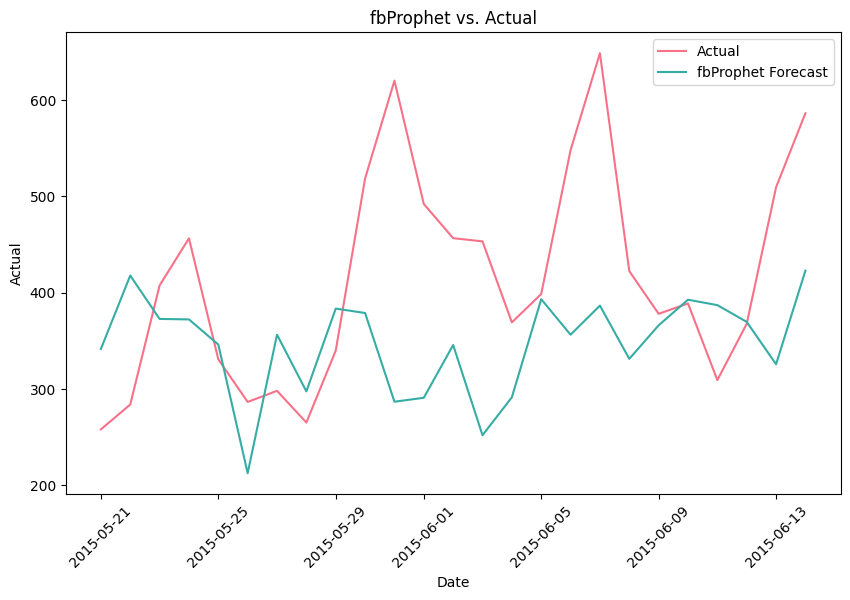

In [16]:
plot_predictions(df_test_p['date'], model_df_test['y'],  forecast['yhat'], 'fbProphet Forecast', 'fbProphet vs. Actual')